# `Thera Bank Personal Loan Campaign`

## `Domain: `
Banking

## `Context: `
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.


## `Data Description: `
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.


## `Clarifications: `
* <b>Liability customers</b> - All entries in the dataset.


## `Attributes Information:`
*	<b>ID</b>: Customer ID.
*	<b>Age</b>: Customer's age in completed years.
*	<b>Experience</b>: # of years of professional experience.
*   <b>Income</b>: Annual income of the customer.
*	<b>ZIP Code</b>: Home Address ZIP.
*	<b>Family</b>: Family size of the customer.
*	<b>CCAvg</b>: Avg. spending on credit cards per month.
*	<b>Education</b>: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional.
*	<b>Mortgage</b>: Value of house mortgage if any.
*	<b>Personal Loan</b>: Did this customer accept the personal loan offered in the last campaign?
*	<b>Securities Account</b>: Does the customer have a securities account with the bank?
*	<b>CD Account</b>: Does the customer have a certificate of deposit (CD) account with the bank?
*	<b>Online</b>: Does the customer use internet banking facilities?
*	<b>Credit card</b>: Does the customer use a credit card issued by the bank?

## `Objective: `
The classification goal is to predict the likelihood of a liability customer buying personal loans.



## `Steps and tasks`

<ol>
<li><a href = #link1>Import the dataset and basic libraries</a></li>
<li><a href = #eda_section>EDA & findings</a></li>
    <ol>
        <li><a href = "#eda_uni_section">Univariate Analysis</a></li>
        <li><a href = "#eda_bi_section">Bivariate Analysis</a></li>
        <li><a href = "#ready_model">Getting data model ready</a></li>
    </ol>
<li><a href = #data_split_section>Split Data</a></li>
<li><a href = #logit_reg_section>Use the Logistic Regression</a></li>
<li><a href = #logit_reg_coeff_section>Find out coefficients</a></li>
<li><a href = #conclusions_section>Conclusions</a></li>
</ol>

## <a id = "link1"></a> 1. Import the dataset, basic libraries & shape.

<div class="alert alert-block alert-warning">
<b>Only essentials!</b> Everything else (datatype, statistical summary, null values or incorrect imputation) makes sense to do in <a href = #eda_section>EDA section</a> as it needed there.
</div>

In [290]:
# Basic imports
import pandas as pd
import numpy as np

# Plots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# We will import rest the othe libraries as needed close to the usage context.

In [291]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [292]:
df.shape

(5000, 14)

## <a id = "eda_section"></a> 2. EDA & findings
Study the data distribution in each attribute and target variable, share your findings.

<div class="alert alert-block alert-success">
Includes all the parts requested by the #1 e.g. datatype, statistical summary, null values or incorrect imputation etc.
</div>


## <a id = "eda_uni_section"></a> Univariate Analysis

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Insights:**

- There are 5000 clients in the dataset.
- There are no NULL values.
- All data types are numerical: float64(1), int64(13).

In [294]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Insights:**

- All clients are in the **age** range [23;67] years.
- **Familty size** is [1;4] people.
- We can assume that professional **Experience** is in the range [0;43] years. There are also <b style="color:orange">strange</b> negative values that we will need to take care of.
- **Income** ranges \\$[8;224]k, but 50% of the clients have income below $64k.
- **CCAvg**, **Mortgage** and **Income** are numerical continuous in general, **positively skewed**.
- 50% of the clients do not have  house **mortgage** or bank's **credit card**.
- 75% of the clients do not have **Personal Loan**, **CD** or **Securities** accounts.
- Also we can see a potential outlier for **ZIP Code**, the value <b style="color:orange">9307</b> is 10x less then 25th percentale value. All the other values are in 90k area.


In [295]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

**Insights:**

- **ID** column has 5000 unique values, this gives each client a unique id which has no value for the task at hand.
- **ZIP Code** column has 467 unique values, we should see the distribution of loans across zip codes in order to see if it is valuable for our analysis, see <a href = #eda_bi_section>Bivariate Analysis</a>.
- Columns **Personal Loan, Securities Account, CD Account, Online and CreditCard** represent categorical binary variables.
- **Familty size** is a categorical too as it has only 4 discrete values.
- We know **Education** column is categorical by description. Values:  1: Undergrad; 2: Graduate; 3: Advanced/Professional.


In [296]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

**Insights:**

- Confirmed again that we have no NULL values

In [297]:
df['Mortgage'].value_counts(ascending=False)

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

In [298]:
df['Mortgage'].value_counts(normalize=True, ascending=False)

0      0.6924
98     0.0034
103    0.0032
119    0.0032
83     0.0032
        ...  
541    0.0002
509    0.0002
505    0.0002
485    0.0002
577    0.0002
Name: Mortgage, Length: 347, dtype: float64

**Insights:**

- 3462 people or ~70% out of 5000 do not have mortgage.

In [299]:
df['CCAvg'].value_counts().sort_index()

0.0     106
0.1     183
0.2     204
0.3     241
0.4     179
       ... 
8.8       9
8.9       1
9.0       2
9.3       1
10.0      3
Name: CCAvg, Length: 108, dtype: int64

**Insights:**

- 106 people have zero credit card spending.

In [300]:
# Ratio for binary columns
binary_ration_df = pd.DataFrame();
binary_ration_df['Count'] = df.loc[:,'Personal Loan':'CreditCard'].sum()
binary_ration_df['Percentage'] =  binary_ration_df['Count']/df.shape[0]*100
binary_ration_df

,Count,Percentage
Personal Loan,480,9.60
Securities Account,522,10.44
CD Account,302,6.04
Online,2984,59.68
CreditCard,1470,29.40


**Insights:**
- About ~60% of the clients use online banking.
- Just ~30% of all clients have bank's credit card.
- Very low percentage for clients who took loan or have Security/CD accounts.
- There is a slight imbalance in the data but no need to treat it.

In [301]:
family_df = pd.DataFrame()
family_df['Count'] = df['Family'].value_counts()
family_df['Percentage'] =  family_df['Count']/df.shape[0]*100
family_df

,Count,Percentage
1,1472,29.44
2,1296,25.92
4,1222,24.44
3,1010,20.20


**Insights:**
- About ~30% of the clients are single.
- About the same number of clients with family sizes 2 & 4.

**Value counts for categorical columns**

<div class="alert alert-block alert-warning">
Although <b>ID</b> is a categorical variable, it is obvious that it has no value in EDA, hence it is excluded as noise.
</div>

In [302]:
# Print value counts for strictly categorical variables,
for cat_col in ['ZIP Code', 'Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']:
   print(df[cat_col].value_counts())

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 467, dtype: int64
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
1    2096
3    1501
2    1403
Name: Education, dtype: int64
0    4520
1     480
Name: Personal Loan, dtype: int64
0    4478
1     522
Name: Securities Account, dtype: int64
0    4698
1     302
Name: CD Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64


**Insights:**
- We see a good distribution for **Family**, **Education** and **Online** without too much skew.
- Also we see that majority of clients do not have bank's products - **Personal Loan**, **Securities Account**, **CD Account** and **CreditCard**.
- Interesting to notice that some **ZIP codes** have more clients than others.

**Let's check ZIP Code**

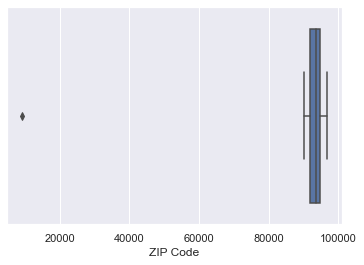

Client's count by 9307 code: 1
Has Personal Loan: 0.0


In [303]:
sns.boxplot(x=df['ZIP Code'])
plt.show()

print('Client\'s count by 9307 code:', df[df['ZIP Code']==9307].count()[0])
print('Has Personal Loan:', df[df['ZIP Code']==9307].iloc[0]['Personal Loan'])


**Insights:**
- Here is the outlier, we already know it's *9307*. It's a single client who did not take personal loan. Therefore we can drop the record or fix it by multipling it by 10.

Let's fix it.

In [304]:
df[df['ZIP Code']==9307]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
384,385,51,25,21,9307,4,0.6,3,0,0,0,0,1,1


In [305]:
# Way 1
# df['ZIP Code'] = df['ZIP Code'].replace([9307], 93070)

# Way 2
df.loc[384,'ZIP Code'] = 93070

And see the distribution

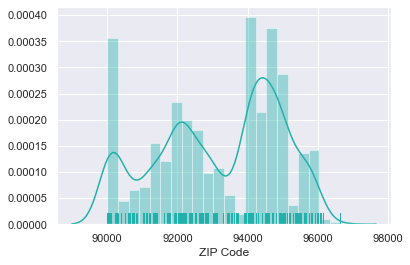

-0.29616276777508316


In [306]:
sns.distplot(df['ZIP Code'], color='lightseagreen', kde=True, rug=True)
plt.grid(True)
plt.show()

print(df['ZIP Code'].skew())

**Insights:**
- As we saw before some **ZIP codes** have much more clients than the others. Let's check it more in the <a href = #eda_bi_section>Bivariate Analysis</a>.

**Skewness & Distribution for continous columns**

In [307]:
df[['CCAvg','Mortgage','Income']].skew()

CCAvg       1.598443
Mortgage    2.104002
Income      0.841339
dtype: float64

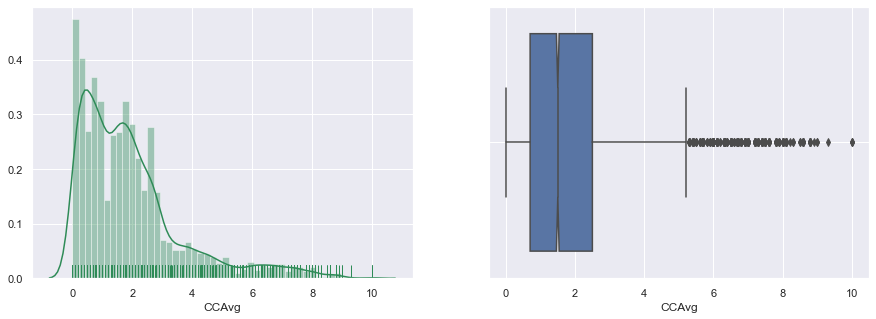

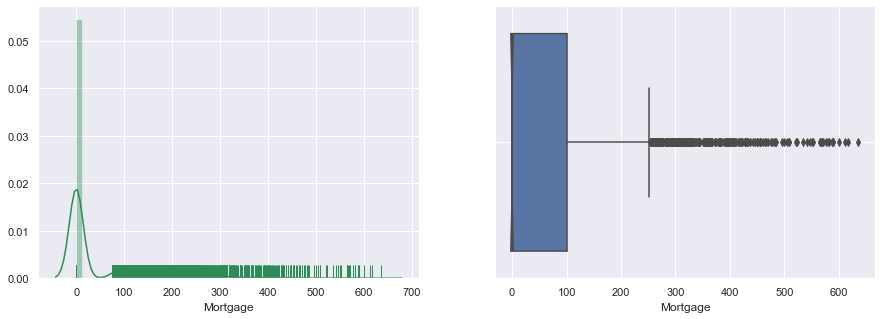

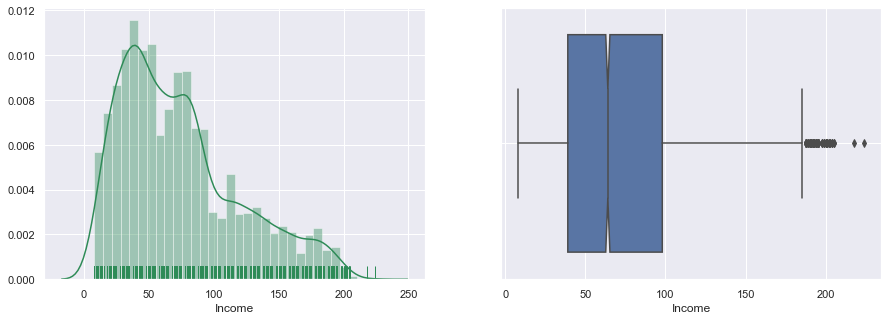

In [356]:
for col in ['CCAvg','Mortgage','Income']:
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    sns.distplot(df[col], color='seagreen', kde=True, rug=True)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], notch = True)
    plt.grid(True)
    plt.show()

**Insights:**
- Data for all three is **positively skewed** but we won't treat it as a bank is supposed to have skewed clients, If we treat the data here it will increase the bias.
- Since 70% of the clients do not have **Mortgage** we could try and convert **Mortgage** column to a binary variable.

**Skewness & Distribution for Age/Experience columns**

In [357]:
df[['Age', 'Experience']].skew()

Age          -0.029341
Experience   -0.026325
dtype: float64

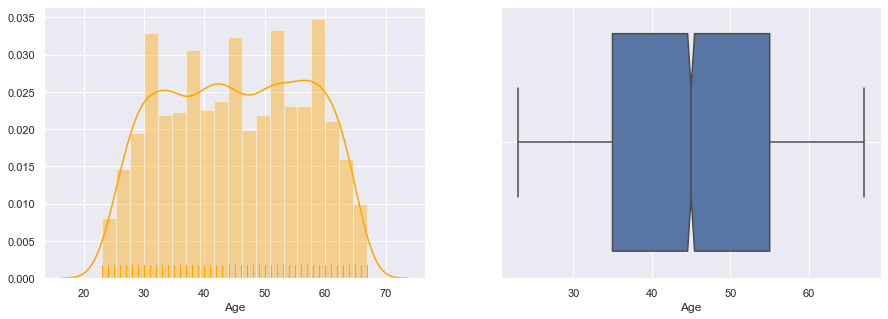

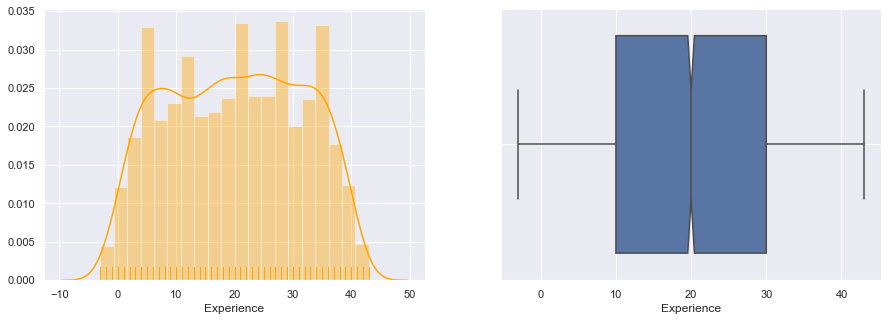

In [358]:
for col in ['Age', 'Experience']:
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    sns.distplot(df[col], color='orange', kde=True, rug=True)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], notch = True)
    plt.grid(True)
    plt.show()

**Insights:**

- Skewness for **ages** is very low, 50% of clients are between **35** and **55** yeas old.
- Even though **Experience** column has some negative values, we can see how distribution resambles that for the **Age**, we will handle this in the <a href = #eda_bi_section>Bivariate Analysis</a>.

## <a id = "eda_bi_section"></a> Bivariate Analysis

### **Age vs Experience** and imputing values

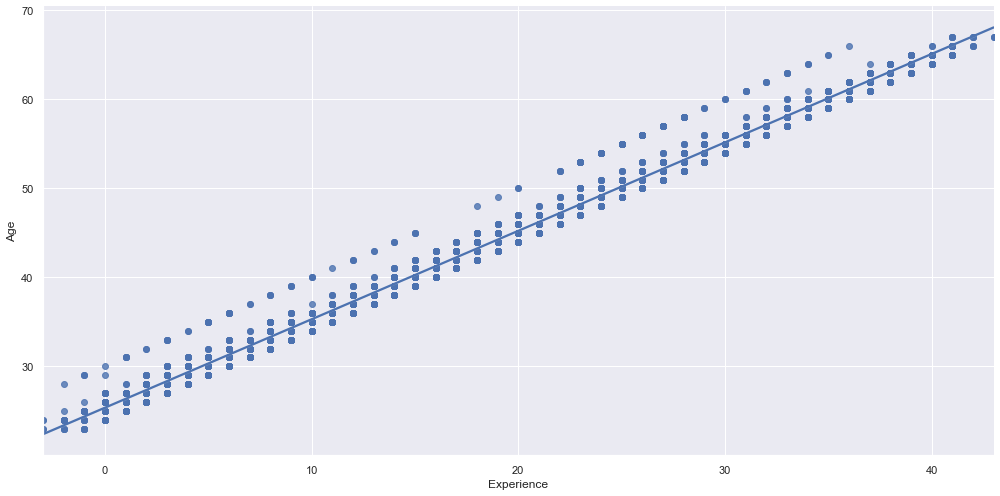

Age/Experience correlation: 0.994214856968332


In [311]:
age_exp_df = df[['Age','Experience']].copy()
sns.lmplot(data=age_exp_df, x='Experience', y='Age', fit_reg = True, height=7, aspect=2)
plt.show()

print('Age/Experience correlation:', age_exp_df['Age'].corr(age_exp_df['Experience']))

**Insights:**

- Strong positive linear correlation between **Age** and **Experience**.
- **Data multicollinearity** As we are going to use Logistic regression, we will assume that all exploratory variables are independent, this correlation can cause problems when fitting the model and interpreting the results. This should not affect prediction precission, but we may want to exclude one of them in case we want to interpret influence of these variables.

Let's see what we know about negative values in Experience column

Negative value counts:
 -1    33
-2    15
-3     4
Name: Experience, dtype: int64

Negative value total count: 52
Ages range for negative experience: [23;29]


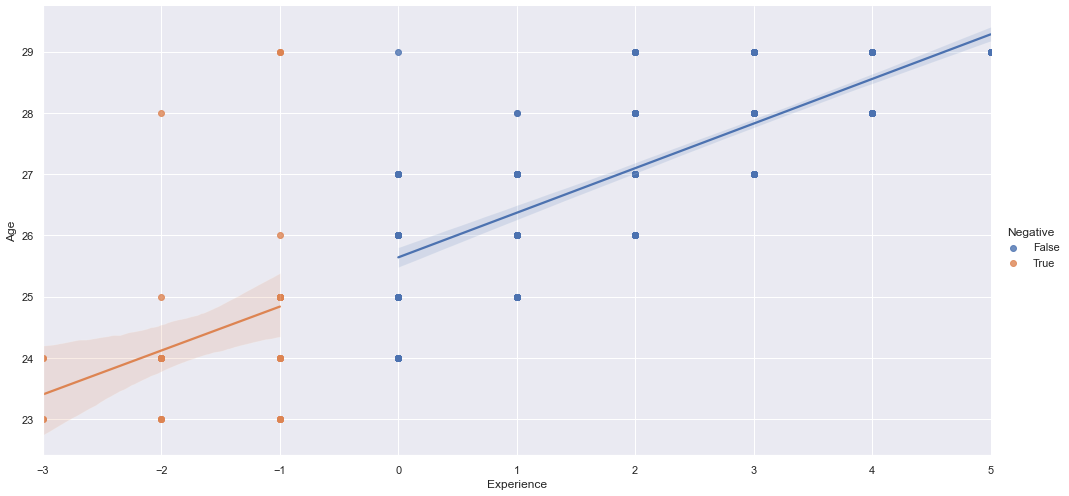

In [312]:
age_exp_df['Negative'] = df['Experience'] < 0
neg_exp_df = age_exp_df[age_exp_df['Experience'] < 0]
print('Negative value counts:\n', neg_exp_df['Experience'].value_counts())
print('\nNegative value total count:', neg_exp_df['Experience'].count())

min_age = neg_exp_df['Age'].min()
max_age = neg_exp_df['Age'].max()
print('Ages range for negative experience: [{};{}]'.format(min_age, max_age))

age_exp_df = age_exp_df[(age_exp_df['Age'] >= min_age) & (age_exp_df['Age'] <= max_age)]
sns.lmplot(data=age_exp_df, x='Experience', y='Age', fit_reg = True, hue = 'Negative', height=7, aspect=2)
plt.show()

**Insights:**

- **Experience** column has totaly 52 negative values, they are -3, -2 and -1. The **Age** range for those values is [23;29]. We can notice that positive values 1, 2 and 3 are also in the similar range [25;29]. Therefore because of the linear association we can assume that '-' sign was a mistake and we can convert those values to positive values.

**Let's check what will happen if we implement the fix**

In [313]:
# Check new skewness
exp_df = df[['Experience']].copy()
exp_df['Fixed Experience'] = exp_df['Experience'].apply(abs)
exp_df[['Experience', 'Fixed Experience']].skew()

Experience         -0.026325
Fixed Experience   -0.010038
dtype: float64

In [314]:
# Check new pivot table
exp_df[['Experience', 'Fixed Experience']].describe().T

,count,mean,std,min,25%,50%,75%,max
Experience,5000.0,20.1046,11.467954,-3.0,10.0,20.0,30.0,43.0
Fixed Experience,5000.0,20.1346,11.415189,0.0,10.0,20.0,30.0,43.0


**Insights:**

- As the result we improved skewness, median did not change and average changed just a little. Assuming we made a good wrong value imputation.
- But more over, since there is a very strong correlation **0.99** with **Age**, we will drop **Experience** from our final dataset and avoid need for value imputing alltogeher.

### **ZIP Code vs Personal Loan**
Is it useful? Lets see the rates of accepted/not accepted loans by ZIP codes.

Let's see the distribution of success rate for personal loan acceptance by ZIP code.

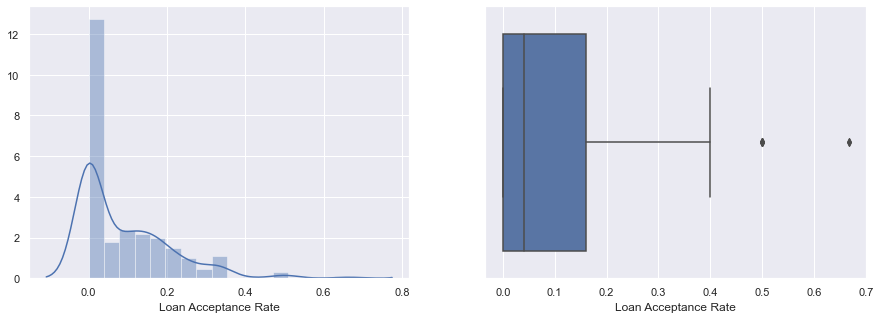

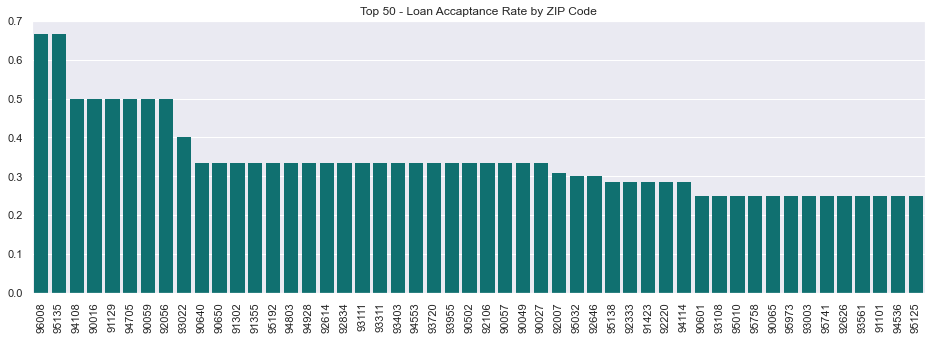

Client's living by 96008: 3
Client's living by 95135: 3
Client's living by 94108: 4
Client's living by 90016: 2
Client's living by 91129: 2
Client's living by 94705: 4
Client's living by 90059: 4
Client's living by 92056: 6
Client's living by 93022: 5
Client's living by 90640: 3


In [315]:
def get_ratio(data):
    ratios = data['Personal Loan'].value_counts(normalize=True).sort_index()
    return ratios[1] if len(ratios) == 2 else 0
    
zip_loan_ratio_df = df[['ZIP Code', 'Personal Loan']].groupby(['ZIP Code']).apply(get_ratio).reset_index().rename(columns={0:'Loan Acceptance Rate'})
zip_loan_ratio_df = zip_loan_ratio_df.sort_values(by='Loan Acceptance Rate', ascending=False)

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.distplot(zip_loan_ratio_df['Loan Acceptance Rate'])
plt.subplot(1, 2, 2)
sns.boxplot(zip_loan_ratio_df['Loan Acceptance Rate'])
plt.show()

zip_loan_ratio_df = zip_loan_ratio_df.head(50)

plt.figure(figsize=(16,5))
chart = sns.barplot(x='ZIP Code', y='Loan Acceptance Rate', data=zip_loan_ratio_df, order = zip_loan_ratio_df['ZIP Code'], color='teal', linewidth = 0)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set(
    title='Top 50 - Loan Accaptance Rate by ZIP Code',
    xlabel='',
    ylabel='')
plt.show()

for zcode in zip_loan_ratio_df['ZIP Code'].head(10):
    print('Client\'s living by {}: {}'.format(zcode, df[df['ZIP Code'] == zcode]['ZIP Code'].count()))


**Insights:**

- As we can see the acceptance rate is  **positively skewed** and very low in general. The higest rates **0.4** - **0.7** look like the **outliers**, and the reason being the number of clients living by those ZIP codes is very low 3-6, so the data is not really representative. Hence we can conclude that for this dataset we can **exclude** **ZIP code** from further analysis. This will also simplify necessary data treatment before the classification since we don't need to adapt categorical variable with 467 unique values.
- In the case we had a more virsatile data, there could've been some tangible difference in loan accaptance rate by ZIP code. Then we would probably break all codes in some "rate-groups" for further processing & classification.

### **Traget variable and the rest**
Let's have a look at the target column which is **Personal Loan** to understand how the data is distributed amongst the various values

In [316]:
clean_df = df.drop(['ID', 'ZIP Code', 'Experience'], axis=1)
clean_df.groupby(['Personal Loan']).mean()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,
0,45.367257,66.237389,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,45.066667,144.745833,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


In [317]:
clean_df.groupby(['Personal Loan']).median()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,
0,45.0,59.0,2.0,1.4,2.0,0.0,0.0,0.0,1.0,0.0
1,45.0,142.5,3.0,3.8,2.0,0.0,0.0,0.0,1.0,0.0


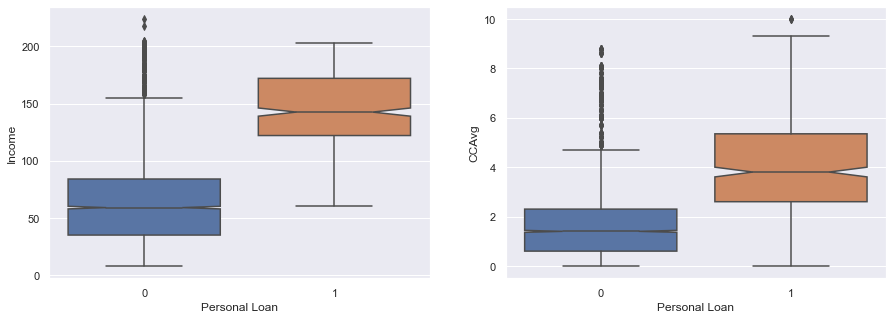

In [318]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Personal Loan', y='Income', data=df, notch = True)

plt.subplot(1, 2, 2)
sns.boxplot(x='Personal Loan', y='CCAvg', data=df, notch = True)

plt.show()

**Insights:**

- People who accept loan proposition also have higer income and more credit card spendings.
- Things like Age, Education etc. do not exibit any relationships with the target variable.
- It seems from **mean** table that people who take loan also have CD Account open more often, we will see further.

**Let's have a look at Age / Personal Loan**

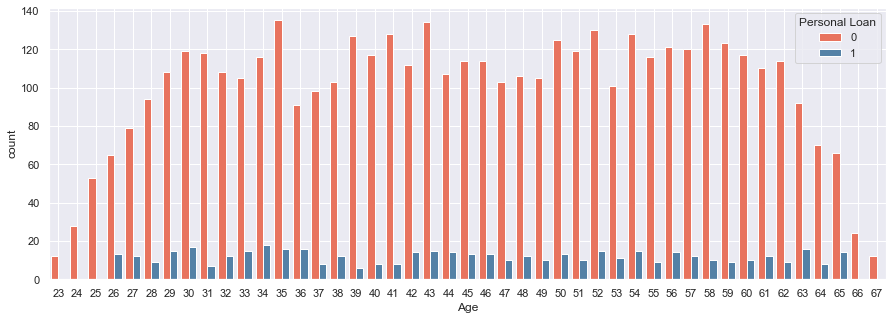

Clent ages with no loan: [23, 24, 25, 66, 67]
Total # of people in age groups with no loan: 129 which is 2.58% of all


In [319]:
plt.figure(figsize=(15,5))
sns.countplot(df['Age'], hue=df['Personal Loan'], palette=['tomato', 'steelblue'])
plt.grid(True)
plt.show()

age_loan_cross_df = pd.crosstab(df['Age'], df['Personal Loan'], margins=False).reset_index()
ages_no_loan = list(age_loan_cross_df[age_loan_cross_df[1] == 0]['Age'].values)
print('Clent ages with no loan:', ages_no_loan)

young_old_clients = len(df[(df['Age'] >= 66) | (df['Age'] <=25)])
print('Total # of people in age groups with no loan: {} which is {}% of all'.format(young_old_clients, (young_old_clients/len(df)) * 100))

**Insights:**

- Very young and old people don't have loans at all, groups >=67 or <=25 years, but this is just 2.58% of the bank's clients.
- The rest of the ages are somewhat similar in ratio for acceptance/rejection of the personal loan.

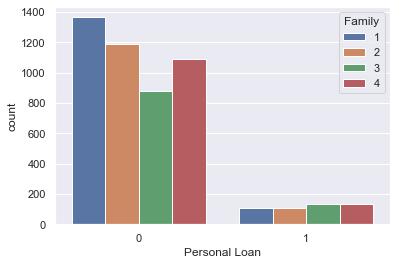

Personal Loan,0,1
Family,,
1,0.927310,0.072690
2,0.918210,0.081790
3,0.868317,0.131683
4,0.890344,0.109656


In [320]:
sns.countplot(df['Personal Loan'], hue=df['Family'])
plt.show()
pd.crosstab(df['Family'], df['Personal Loan'], normalize='index')

**Insights:**

- From the small number of people who accepted the loan, there is a slight bias towards the families with 3 or 4 members.

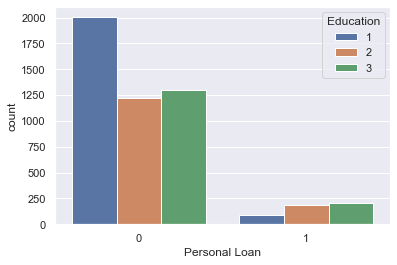

Personal Loan,0,1
Education,,
1,0.955630,0.044370
2,0.870278,0.129722
3,0.863424,0.136576


In [321]:
sns.countplot(df['Personal Loan'], hue=df['Education'])
plt.show()
pd.crosstab(df['Education'], df['Personal Loan'], normalize='index')

**Insights:**

- Similar picture, but from the Edication perspective. There is a slight bias towards the people with higer education.

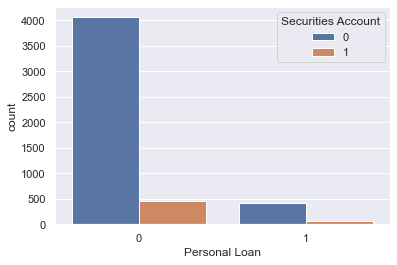

Personal Loan,0,1
Securities Account,,
0,0.897788,0.875
1,0.102212,0.125


In [322]:
sns.countplot(df['Personal Loan'], hue=df['Securities Account'])
plt.show()
pd.crosstab(df['Securities Account'], df['Personal Loan'], normalize='columns')

**Insights:**

- Again very small loan accaptance rate, but for people who accepted the loan ~87% did not have Security Account.

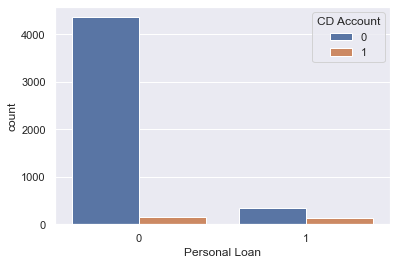

Personal Loan,0,1
CD Account,,
0,0.964159,0.708333
1,0.035841,0.291667


In [323]:
sns.countplot(df['Personal Loan'], hue=df['CD Account'])
plt.show()
pd.crosstab(df['CD Account'], df['Personal Loan'], normalize='columns')

**Insights:**

- Again very small loan accaptance rate, but for people who accepted the loan ~70% did not have CD Account.

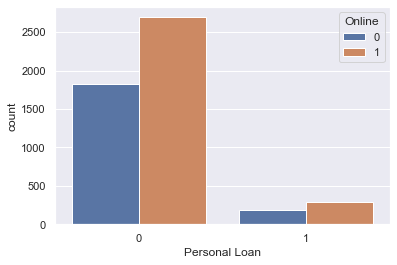

Personal Loan,0,1
Online,,
0,0.404204,0.39375
1,0.595796,0.60625


In [324]:
sns.countplot(df['Personal Loan'], hue=df['Online'])
plt.show()
pd.crosstab(df['Online'], df['Personal Loan'], normalize='columns')

**Insights:**

- From the people who accepted the loan ~60% used Internet Banking.

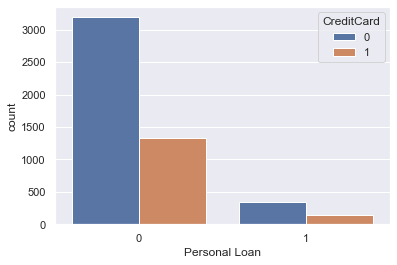

Personal Loan,0,1
CreditCard,,
0,0.706416,0.702083
1,0.293584,0.297917


In [325]:
sns.countplot(df['Personal Loan'], hue=df['CreditCard'])
plt.show()
pd.crosstab(df['CreditCard'], df['Personal Loan'], normalize='columns')

**Insights:**

- Again very small loan accaptance rate, people who accepted the loan in ~70% of cases did not have bank's credit card.

**Let's have a look at correlation coefficients between exploratory variables**

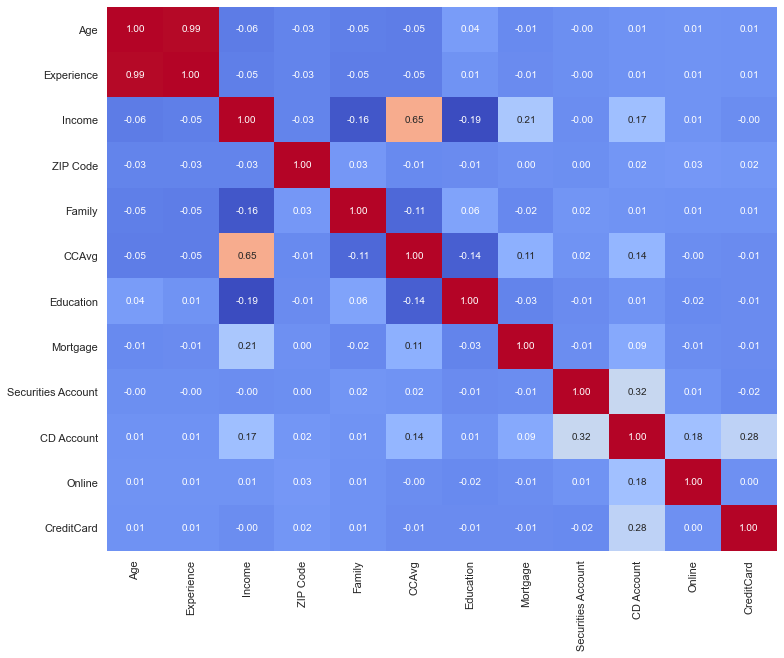

In [326]:
corr_coeff = df.drop(['Personal Loan', 'ID'], axis=1).corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_coeff, annot = True, cmap='coolwarm', fmt='0.2f', cbar = False)
plt.show()

**Insights:**

- As we see there is almost no correlation between exploratory variables, except **Age** / **Experience** and hence we decided to drop **Experience** from the final set.

Let's see scatter plots for the variables that have at least 0.2 correlation coefficient.

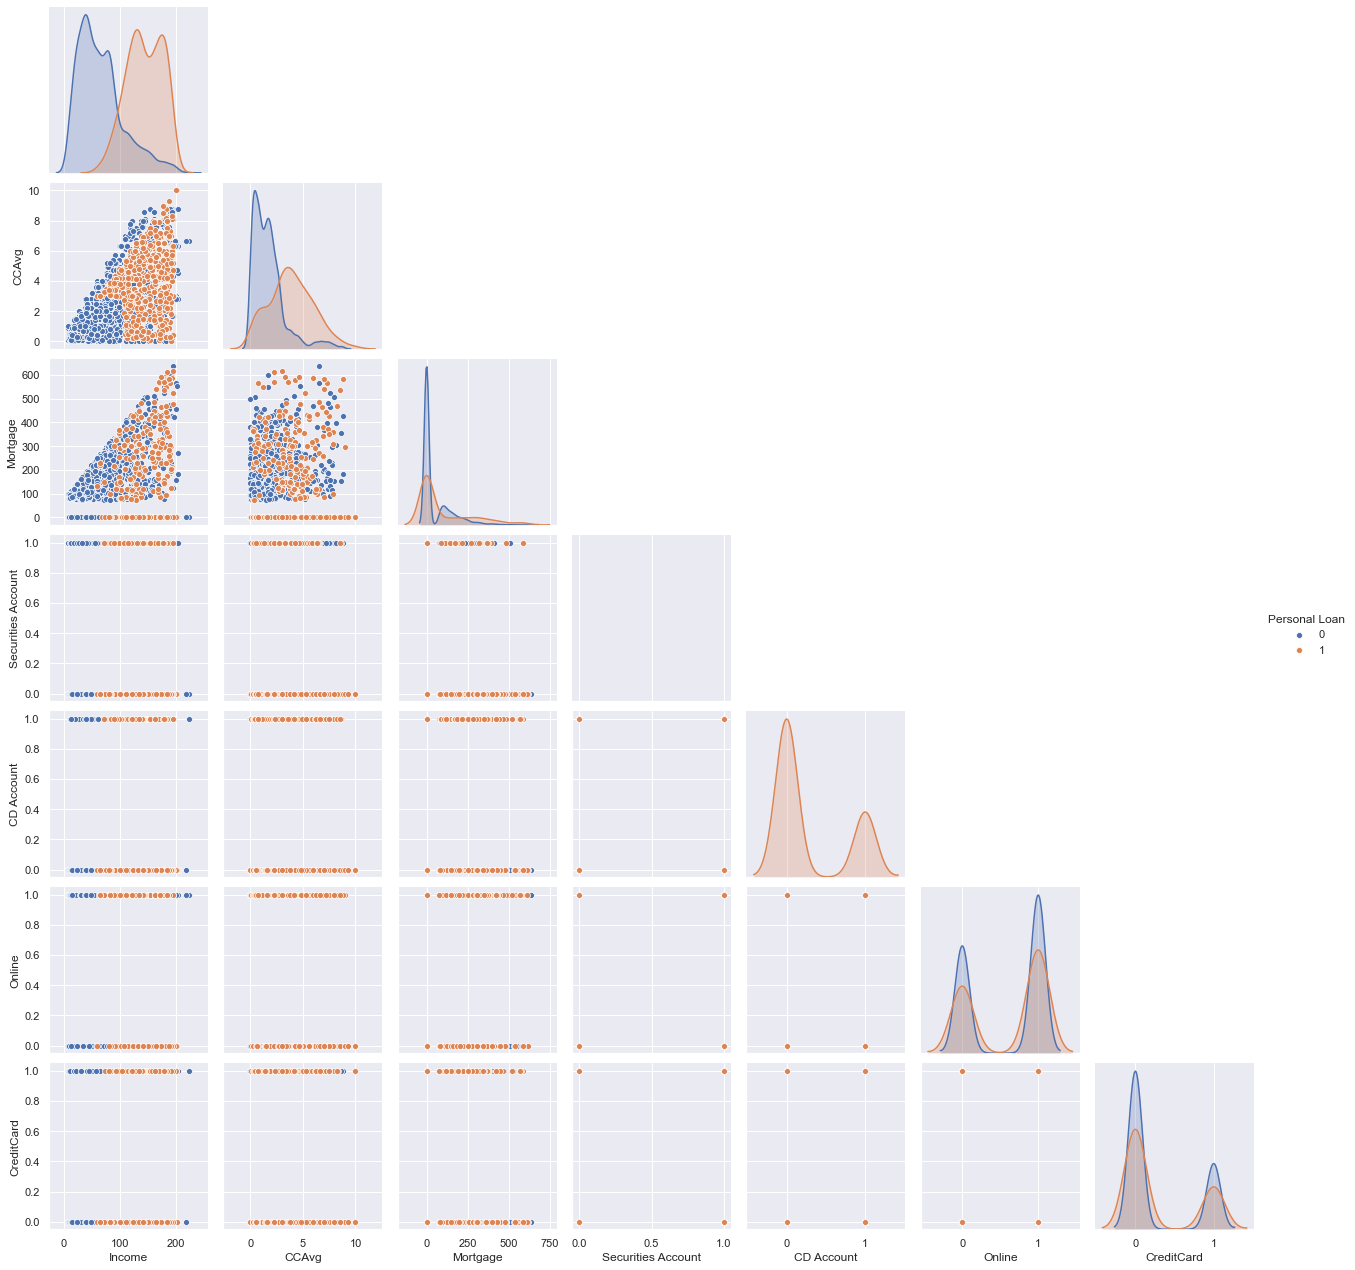

In [327]:
clean_df = df.drop(['ID', 'ZIP Code', 'Experience', 'Education', 'Family', 'Age'], axis=1)
sns.pairplot(clean_df, corner=True, hue='Personal Loan')
plt.show()

**Insights:**

- Here we can see that people with higer **Income** also spend more on credit cards (**CCAvg**). There is also some minor visual positive correlation between **Income** and **Mortgage**.

## <a id = "ready_model"></a> Getting data model ready

In [328]:
# Drop columns as discussed earlier.
fdf = df.drop(['ID', 'ZIP Code', 'Experience'], axis=1)

# Convert to categorical variable as needed
fdf['Personal Loan'] = fdf['Personal Loan'].astype('category')
fdf['Securities Account'] = fdf['Securities Account'].astype('category')
fdf['CD Account'] = fdf['CD Account'].astype('category')
fdf['Online'] = fdf['Online'].astype('category')
fdf['CreditCard'] = fdf['CreditCard'].astype('category')
fdf['Family'] = fdf['Family'].astype('category')
fdf['Education'] = fdf['Education'].astype('category')

# Define X and Y variables
X = fdf.drop('Personal Loan', axis=1)
Y = fdf['Personal Loan']

# Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Income                5000 non-null   int64  
 2   CCAvg                 5000 non-null   float64
 3   Mortgage              5000 non-null   int64  
 4   Family_2              5000 non-null   uint8  
 5   Family_3              5000 non-null   uint8  
 6   Family_4              5000 non-null   uint8  
 7   Education_2           5000 non-null   uint8  
 8   Education_3           5000 non-null   uint8  
 9   Securities Account_1  5000 non-null   uint8  
 10  CD Account_1          5000 non-null   uint8  
 11  Online_1              5000 non-null   uint8  
 12  CreditCard_1          5000 non-null   uint8  
dtypes: float64(1), int64(3), uint8(9)
memory usage: 200.3 KB


**Insights:**

- We see multiple columns created for **Family** and **Education**, this is one-hot encoding. Binary variables are already in this format.

## <a id = "data_split_section"></a> 3. Split Data
Split the data into training and test set in the ratio of 70:30 respectively.

In [329]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=33)

In [330]:
def get_percentage(df, subset):
    return len(subset)/len(df.index) * 100

print('{0:0.2f}% data is in training set'.format(get_percentage(fdf, X_train)))
print('{0:0.2f}% data is in test set'.format(get_percentage(fdf, X_test)))

70.00% data is in training set
30.00% data is in test set


Now let's check **Personal Loan** ratio in split data

In [331]:
def get_count_percentage_df(df, col, value):
    matching_count = len(df[df[col] == value])
    percentage_of_total = (matching_count/len(df.index)) * 100
    return [matching_count, percentage_of_total]

def get_count_percentage_s(s, value):
    matching_count = len(s[s == value])
    percentage_of_total = (matching_count/len(s)) * 100
    return [matching_count, percentage_of_total]

count, percentage = get_count_percentage_df(fdf, 'Personal Loan', 1)
print("Original - Personal Loan 1 : {0} ({1:0.2f}%)".format(count, percentage))
count, percentage = get_count_percentage_df(fdf, 'Personal Loan', 0)
print("Original - Personal Loan 0 : {0} ({1:0.2f}%)".format(count, percentage))
print()
count, percentage = get_count_percentage_s(y_train, 1)
print("Training - Personal Loan 1 : {0} ({1:0.2f}%)".format(count, percentage))
count, percentage = get_count_percentage_s(y_train, 0)
print("Training - Personal Loan 0 : {0} ({1:0.2f}%)".format(count, percentage))
print()
count, percentage = get_count_percentage_s(y_test, 1)
print("Test     - Personal Loan 1 : {0} ({1:0.2f}%)".format(count, percentage))
count, percentage = get_count_percentage_s(y_test, 0)
print("Test     - Personal Loan 0 : {0} ({1:0.2f}%)".format(count, percentage))


Original - Personal Loan 1 : 480 (9.60%)
Original - Personal Loan 0 : 4520 (90.40%)

Training - Personal Loan 1 : 320 (9.14%)
Training - Personal Loan 0 : 3180 (90.86%)

Test     - Personal Loan 1 : 160 (10.67%)
Test     - Personal Loan 0 : 1340 (89.33%)


**Insights:**

- Testing & Training data has Personal Loan accaptance/rejection rate close to the original dataset, good split.

## <a id = "logit_reg_section"></a> 4. Use the Logistic Regression
Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix.

In [332]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='newton-cg', random_state=55)  # lbfgs

# Fit the model on train data
logreg.fit(X_train, y_train)

# Predict the target variable on test data
y_predict = logreg.predict(X_test)

**Performance Metrics**

In [333]:
print('Trainig accuracy:', logreg.score(X_train, y_train))  
print('Testing accuracy:', logreg.score(X_test, y_test))
print('Recall          :', recall_score(y_test, y_predict))
print('Precision       :', precision_score(y_test, y_predict))
print('F1 Score        :', f1_score(y_test, y_predict))
print('Roc Auc Score   :', roc_auc_score(y_test, y_predict))
print()

# Way 2 - using accuracy_score func
print('Testing accuracy:', accuracy_score(y_test, y_predict ))

# Way 3
print()
print(classification_report(y_test, y_predict))

Trainig accuracy: 0.9608571428571429
Testing accuracy: 0.954
Recall          : 0.64375
Precision       : 0.8956521739130435
F1 Score        : 0.7490909090909093
Roc Auc Score   : 0.8173973880597015

Testing accuracy: 0.954

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1340
           1       0.90      0.64      0.75       160

    accuracy                           0.95      1500
   macro avg       0.93      0.82      0.86      1500
weighted avg       0.95      0.95      0.95      1500



 **Insights:**
 - **LogisticRegration** from sklearn uses **P > 0.5** as the theshold for classification.
 - We got slightly better results with **newton-cg** solver.
 - **Accuracy** is almost at its best - **0.95**. Hence **Error Rate** is **0.05**.
 - **Precision** is the ratio TP / (TP + FP). This is the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0. We have roughly **0.89**, which is relatively good result.
 - **Reacall** is the ratio TP / (TP + FN). This is the ability of the classifier to find all the positive samples. The best value is 1 and the worst value is 0. We have roughly **0.64**, not the best result.
 - The **F1 score** can be interpreted as a weighted average of the precision and recall, an F1 score reaches its best at 1 and worst score at 0. As expected, we have roughly **0.75**, relatively good overall.
 - **Roc Auc Score** Area under the curve, this performance metric describes our model itself, it is classification threshold invariant. The best value is 1 and the worst value is 0. We have **82%** of correct predictions.

**Confusion Matrix**

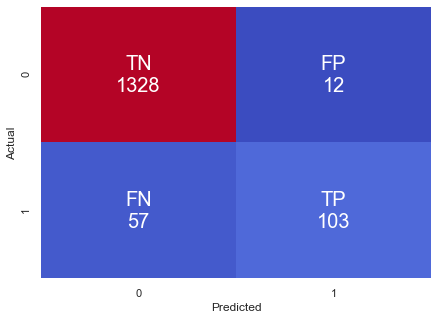

Sensitivity/Recall/TPR: 0.64375
Specificity/TNR       : 0.991044776119403


In [334]:
cm = confusion_matrix(y_test, y_predict)

group_names = ['TN', 'FP', 'FN', 'TP']
group_counts = ['{}'.format(value) for value in cm.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=labels, fmt='', xticklabels = [0, 1], yticklabels = [0, 1], cmap='coolwarm', cbar = False, annot_kws={"size": 20})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

cm_dic = { 'TN':cm.flatten()[0], 'FP':cm.flatten()[1], 'FN':cm.flatten()[2], 'TP':cm.flatten()[3] }
print('Sensitivity/Recall/TPR:', cm_dic['TP']/(cm_dic['TP'] + cm_dic['FN']))
print('Specificity/TNR       :', cm_dic['TN']/(cm_dic['FP'] + cm_dic['TN']))

**Insights:**
- **Specificity**, we are very good at predicting people who won't accept loans. We have roughly **0.99**.

- **TP** (True Positives): <b style="color:green">correctly</b> predicted 103 people who accepted personal loan.
- **TN** (True Negatives): <b style="color:green">correctly</b> predicted 1328 people who didn't accept personal loan.

- **FP** (False Positives): <b style="color:orange">incorrectly</b> predicted 12 people to accept personal loan, but they did not. **Type I error**
- **FN** (False Negatives): <b style="color:orange">incorrectly</b> predicted 57 people to not accept personal loan, but they did. **Type II error**

**AUC ROC Curve**

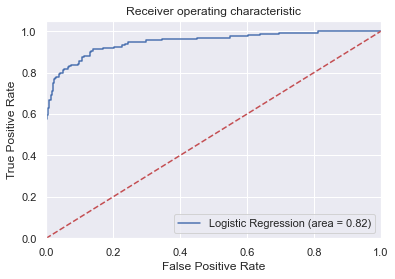

In [335]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC') #  save to PNG
plt.show()

 **Insights:**
 - Area is 0.82 for our model's performance. Good result.

## <a id = "logit_reg_coeff_section"></a> 5.	Find out coefficients
Find out coefficients of all the attributes and show the output in a data frame with column names. For test data show all the rows where the predicted class is not equal to the observed class.

**Feature Importance**

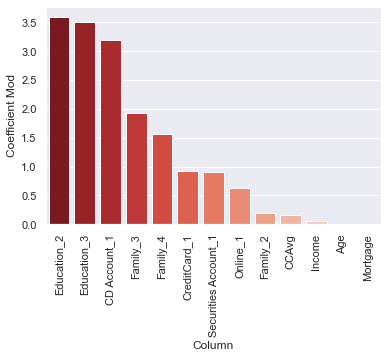

,Column,Coefficient Mod
7,Education_2,3.589304
8,Education_3,3.507811
10,CD Account_1,3.194582
5,Family_3,1.924679
6,Family_4,1.558140
12,CreditCard_1,0.920478
9,Securities Account_1,0.901391
11,Online_1,0.622617
4,Family_2,0.190217
2,CCAvg,0.155123


In [336]:
fi = pd.DataFrame()
fi['Column'] = X_train.columns
fi['Coefficient Mod'] = abs(logreg.coef_[0])
fi.sort_values(by='Coefficient Mod', ascending = False, inplace=True)

chart = sns.barplot(x='Column', y='Coefficient Mod', data=fi, palette='Reds_r') # Blues_r
chart.set_xticklabels(chart.get_xticklabels(),  rotation=90)
plt.show()

fi

**False predictions on test data**

In [337]:
pred_comp_df = X_test.copy()

# add prediction probabilities
pred_comp_df['Probaility for 0'] = logreg.predict_proba(X_test)[:, 0]
pred_comp_df['Probaility for 1'] = logreg.predict_proba(X_test)[:, 1]

# add test and predicted target variable
pred_comp_df['Observed Loan'] = y_test
pred_comp_df['Predicted Loan'] = y_predict

false_pred_df = pred_comp_df[pred_comp_df['Observed Loan'] != pred_comp_df['Predicted Loan']]
false_pred_df

,Age,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1,Probaility for 0,Probaility for 1,Observed Loan,Predicted Loan
1913,57,134,0.9,198,0,0,1,0,0,0,0,1,0,0.935084,0.064916,1,0
2970,54,121,1.1,0,1,0,0,0,1,1,0,0,0,0.888421,0.111579,1,0
1143,33,120,3.2,0,0,0,0,0,1,0,0,1,0,0.808922,0.191078,1,0
459,35,200,3.0,458,1,0,0,0,0,0,0,0,0,0.362731,0.637269,0,1
4357,39,141,6.3,0,0,0,1,0,0,1,1,1,1,0.560463,0.439537,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552,29,195,4.3,0,0,0,0,0,0,0,0,0,0,0.414164,0.585836,0,1
322,63,101,3.9,0,0,0,0,0,0,1,1,1,0,0.972032,0.027968,1,0
1793,35,113,0.8,0,0,1,0,0,1,0,0,1,0,0.575196,0.424804,1,0
4627,27,134,1.7,307,0,0,0,1,0,0,0,1,0,0.644046,0.355954,1,0


In [338]:
print('Total {} false predictions'.format(len(false_pred_df)))

Total 69 false predictions


Let's see if changing the treshold will do any good?

In [353]:
def get_misses(actual, predicted_prob, threshold):
    comp_df = X_test.copy().drop(X_test.columns, axis=1)
    comp_df['pred'] = list(map(lambda x: 1 if x > threshold else 0, predicted_prob))
    comp_df['act'] = actual
    false_pred_df = comp_df[comp_df['pred'] != comp_df['act']]
    return len(false_pred_df)
    
    
y_predicted_prob = logreg.predict_proba(X_test)[:, 1]
prob_range = np.arange(0.3, 0.7, 0.05)
false_pred_count = [get_misses(y_test, y_predicted_prob, p) for p in prob_range]

false_pred_prob_df = pd.DataFrame(columns=prob_range, index=['False Predictions'])
false_pred_prob_df.loc['False Predictions'] = false_pred_count
false_pred_prob_df   

,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65
False Predictions,72,69,71,70,69,68,71,70


 **Insights:**
 - As we can see **treshold** of **0.55** instead of **0.50** would improve our predictions by just a little bit, 1 prediction on test dataset.

## <a id = "conclusions_section"></a> 6. Conclusions
Give conclusion related to the Business understanding of your model.

We discussed **Performance Metrics** and **Confusion Matrix** and provided insights in the relative sections above.
Here let's see what it means for the business.

- It is important to mention that there is some disbalance in the initial dataset, we have only 9.6% cases of people accepting loan, and therefore 90.4% of people who did not accept. 

- Consequently, in our model we got very good at detecting people who won't accept personal loan (**Specificity - 0.99**).

- Dispite the disbalance, we still managed to achive **Recall 0.64**, which is not that bad. If we want to get better at predicting potential loan takers we want more data on succesful loan aceptance.

- **F1 score** gives us hormonic mean for **TPR & FPR** and shows us how good we did at predicting people who accepts loan, **0.75** out of 1.

- **Important Features**

Our model excluded **Experience** which has strong liner correlation with **Age**, we could have swapepd them around and get the same results, however as we already know, importance of **Age** variable is very low.

The top 6 of most influencial features for the model's output. Based on the coefficients' values.

1. Education
2. CD Account
3. Family
4. CreditCard
5. Securities Account
6. Online

Interestingly, **Income**, **Age** and **Mortgage** have very low importance.

Therefore this is a good guide for the markenting team.


AUC metric tells us, that our model has correct predictions in **82%** of the cases, which can be considered a good result for use in marketing campaigns.

Overall our model can provide value to the bank and help it in its personal loan campaigns.
